In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We start off by loading and then merging the datasets we want to use:

In [2]:
dat1 = pd.read_csv('key.csv', sep=',')
dat2 = pd.read_csv('SP500_finratios.csv', sep=',', parse_dates=['adate', 'qdate', 'public_date'])
dat3 = pd.read_csv('ratings2.csv', sep=',', parse_dates=['datadate'])

In [3]:
#the columns of the first data set are renamed to match the names of the other data sets
dat1.columns = ['gvkey','linktype','permno','permco','linkdt','linkenddt','conm','tic','cusip']

In [4]:
#the duplicates in the key data set are removed, so that pd.merge() will work
dat1 = dat1.set_index('permno')
dat1 = dat1[~dat1.index.duplicated(keep='first')]
dat1.reset_index(level=0, inplace=True)   #The permnos are converted back to a normal variable, otherwise an error can occur when merging on permno

In [5]:
#the variable datadate is renamed public_date and both are transformed to the same format, so
# that pd.merge()recognises them as one and the same
dat3['public_date'] = dat3['datadate']
del dat3['datadate']
dat2['public_date'] = pd.to_datetime(dat2.public_date)
dat3['public_date'] = pd.to_datetime(dat3.public_date)

In [6]:
dat1and2 = pd.merge(dat1, dat2, on='permno', how='inner', validate='one_to_many')

In [7]:
dat = pd.merge(dat1and2, dat3, on=['gvkey', 'public_date', 'conm', 'tic', 'cusip'], how='inner', validate='one_to_one')

In [8]:
dat

,permno,gvkey,linktype,permco,linkdt,linkenddt,conm,tic,cusip,adate,...,debt_capital,de_ratio,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing,DIVYIELD,splticrm
0,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2008-12-31,...,1.338,-9.366,0.428,0.603,0.664,0.816,NaN,NaN,NaN,B-
1,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
2,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
3,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
4,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.366,-8.617,0.551,0.712,0.780,0.799,NaN,NaN,NaN,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29853,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.286,0.741,1.478,1.961,1.961,0.726,9.038,9.364,NaN,NaN
29854,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,8.184,10.913,NaN,NaN
29855,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,9.392,12.469,NaN,NaN
29856,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,8.557,11.359,NaN,NaN


Now that we have the data, let's have a look at it. First of, we're interested in the distribution of the ratings:

In [9]:
dat['splticrm'].value_counts()

BBB     4946
BBB+    4133
A-      3615
A       3196
BBB-    2654
A+      1670
BB+     1262
AA-      902
BB-      824
BB       757
AA       417
B+       305
AAA      296
AA+      199
B-       133
B        109
CCC+      50
D          4
CCC        2
Name: splticrm, dtype: int64

Seeing as there are only four observations of rating D, and only two observations of rating CCC, our data set does not allow us to draw any conclusions for these ratings and we have to drop them from our sample.

In [10]:
dat = dat[dat['splticrm'] != 'CCC']
dat = dat[dat['splticrm'] != 'D']

Following that, we consider our numerical data:

In [11]:
des = dat.loc[:, 'bm':'cash_lt'].describe()
ind = [3, 1, 5, 7]   #printing the entire .describe() information consumes unnecessarily much computation power, so I index the lines I'm interested in
print(des.iloc[ind], '\n')
des = dat.loc[:, 'invt_act':].describe()  #I do this in two steps, because I don't want any variables hidden behind "..."
ind = [3, 1, 5, 7]
print(des.iloc[ind])

              bm          ps         pcf        dpr        npm        gpm  \
min     0.001000    0.047000 -224.460000  -0.001000 -51.493000 -37.707000   
mean    0.511099    2.530784   12.210846   0.489392   0.080365   0.431986   
50%     0.391000    1.814000   11.113000   0.305000   0.092000   0.406000   
max   137.237000  145.774000  280.893000  80.554000   1.799000   0.982000   

            cfm       roa        roe      roce     efftax     GProf  \
min  -47.694000 -0.595000 -34.647000 -1.111000 -12.365000 -1.143000   
mean   0.152864  0.142624   0.166138  0.176364   0.290338  0.294441   
50%    0.152500  0.139000   0.137000  0.154000   0.302000  0.263500   
max    2.054000  0.626000  15.502000  2.279000  29.944000  1.255000   

      equity_invcap  debt_invcap  totdebt_invcap  capital_ratio     int_debt  \
min      -17.816000     0.000000        0.000000      -5.619000     0.000000   
mean       0.593529     0.389615        0.471293       0.395291     0.336795   
50%        0.63300

The output suggests that several variables have extreme outliers - for instance bm has a minimum of 0.001000, a mean of  0.506463, but a maximum of 137.237000. Visualising the data with boxplots shows this quite notably. This means the imputation method we initially considered, which was based on linear regression, is probably not the best way to handle the missing values.

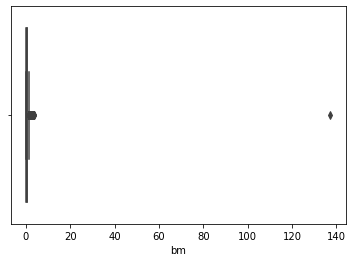

In [12]:
# the outliers we show in these boxplots are so extreme that when we tried using linear regression for
# the imputation, they influenced the slope so much that some negative values where imputed ...
sns.boxplot(x = 'bm', data = dat)

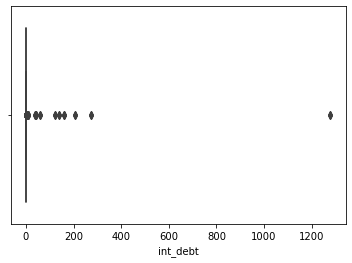

In [13]:
sns.boxplot(x = 'int_debt', data = dat)

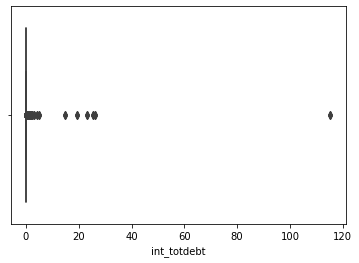

In [14]:
sns.boxplot(x = 'int_totdebt', data = dat)

After looking at the data we have, we take a look at the data we do not have:

In [15]:
#just a little indulgence
class color:
   bold = '\033[1m'
   end = '\033[0m'

In [16]:
col_Names = dat.columns.values
total_NAs = pd.isna(dat).sum()
percentage_NAs = dat.isna().sum()/len(dat)
print(color.bold + "%-20s %-14s %s" %("Column Names", "Total NAs", "NAs per observations") + color.end )
#I used the % operator because tab didn't work and this allows me to define the spaces between the items

#the loop prints one line after another
for item_a, item_b, item_c in zip(col_Names, total_NAs, percentage_NAs):
    print("%-20s %-14d %.6f" %(item_a, item_b, item_c))

Column Names         Total NAs      NAs per observations
permno               0              0.000000
gvkey                0              0.000000
linktype             0              0.000000
permco               0              0.000000
linkdt               0              0.000000
linkenddt            0              0.000000
conm                 0              0.000000
tic                  0              0.000000
cusip                0              0.000000
adate                13             0.000435
qdate                0              0.000000
public_date          0              0.000000
bm                   638            0.021372
ps                   12             0.000402
pcf                  27             0.000904
dpr                  1862           0.062374
npm                  12             0.000402
gpm                  12             0.000402
cfm                  98             0.003283
roa                  27             0.000904
roe                  666            0.02231

As shown here, 4384 observations have no long term credit rating (splticrm), which means we cannot use those observations for our prediction models. Still, the observations might be helpful for imputing missing values, so we will drop them later.

Another variable that stands out is PEG_trailing, and we are unsure how valid it is to impute more than one third of the data. However, dropping the missing values in PEG_trailing is not an option, since they are not missing completely at random: We can show that the missingness is systematic by plotting it against another variable. So, if we were to just drop the missing values, we would bias the remaining data. Instead, we could drop the entire variable, but we might as well keep it in for now, impute the missing values, and if we later find that it reduces the predictive power, we can still drop it. (Spoiler: It does not)

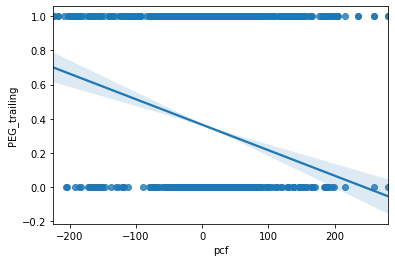

In [17]:
sns.regplot(dat.pcf, dat.PEG_trailing.isna())

So now, we fill in the missing data by using IterativeImputer. Its method is to model each feature with missing values as a function of other features in a round-robin regression. As stated above, linear regression is not an ideal function here, so we decided to use scikit-learn's ExtraTreesRegressor, because it works better with extreme outliers and non-linear relationships.

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [19]:
numerical_dat = dat.loc[:, 'bm':'PEG_trailing']

In [77]:
# defining the imputation method
imp = IterativeImputer(estimator = ExtraTreesRegressor(n_estimators=10, random_state=1, n_jobs=-1))

In [78]:
# actually imputing the values
imputed = imp.fit_transform(numerical_dat)

c:\program files\python37\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [80]:
# the imputation returns an array, so we transform the data back to a dataframe
imputed = pd.DataFrame(data = imputed, columns = numerical_dat.columns.values)

Now that the missing data is imputed, we add public_date, permno and splticrm to the data frame. The first two will be needed later for further analysis, the latter is added so we can drop all observations with missing credit rating.

In [81]:
imputed = pd.concat([imputed, dat.loc[:, 'public_date'], dat.loc[:, 'permno'], dat.loc[:, 'splticrm']], axis = 'columns')
imputed = imputed.dropna(axis = 'rows', how = 'any')

In [82]:
imputed

,bm,ps,pcf,dpr,npm,gpm,cfm,roa,roe,roce,...,de_ratio,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing,public_date,permno,splticrm
0,0.4653,0.113,-5.253,3.6490,-0.072,0.163,-0.018,0.024,-1.5750,-0.058,...,-9.366,0.428,0.603,0.664,0.816,6.3546,-3.1471,2010-01-31,21020.0,B-
1,0.3733,0.153,3.287,4.8817,-0.074,0.150,-0.018,0.010,-1.8864,-0.092,...,-8.291,0.629,0.787,0.859,0.787,9.2910,-2.5938,2010-02-28,21020.0,B-
2,0.3733,0.152,3.258,4.8817,-0.074,0.150,-0.018,0.010,-1.8864,-0.092,...,-8.291,0.629,0.787,0.859,0.787,9.2910,-2.5938,2010-03-31,21020.0,B-
3,0.3733,0.123,2.640,4.8817,-0.074,0.150,-0.018,0.010,-1.8864,-0.092,...,-8.291,0.629,0.787,0.859,0.787,9.2056,-2.5938,2010-04-30,21020.0,B-
4,0.4105,0.127,2.753,4.4286,-0.079,0.150,-0.025,0.009,-1.8864,-0.110,...,-8.617,0.551,0.712,0.780,0.799,9.6632,-2.5376,2010-05-31,21020.0,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29832,0.0780,11.083,28.586,0.0000,0.243,0.982,0.279,0.258,0.2820,0.268,...,0.728,1.982,2.851,2.851,0.650,11.9060,8.0178,2016-09-30,13035.0,BBB
29833,0.0740,13.734,37.120,0.0000,0.217,0.981,0.256,0.239,0.2540,0.250,...,0.704,1.986,2.595,2.595,0.682,14.7840,9.7270,2016-10-31,13035.0,BBB
29834,0.0740,12.452,33.655,0.0000,0.217,0.981,0.256,0.239,0.2540,0.250,...,0.704,1.986,2.595,2.595,0.682,13.4040,10.9732,2016-11-30,13035.0,BBB
29835,0.0740,11.099,29.996,0.0000,0.217,0.981,0.256,0.239,0.2540,0.250,...,0.704,1.986,2.595,2.595,0.682,11.9470,10.9732,2016-12-31,13035.0,BBB


Finally, the time has come to train our prediction model. We assume that including all variables will lead to overfitting, and using just a subset of all variables should improve the result. We test that assumption by trying out both.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [131]:
X = imputed.loc[:, :'PEG_trailing']   # using all variables at our disposal
y = pd.factorize(imputed.loc[:, 'splticrm'])[0]

In [132]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [133]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.97
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [41]:
subset = ['roe', 'curr_ratio', 'bm', 'de_ratio', 'dpr', 'at_turn', 'debt_ebitda']   # using just a subset
X = imputed.loc[:, subset]

In [42]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [43]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.95
Test score:       0.96
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 100, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


When comparing both models, it turns out that using all variables is actually more helpful than using just a subset of variables. Apparently, random forest is not very susceptible to overfitting. Next, we try a support vector classifier (SVC).

In [44]:
X = imputed.loc[:, :'PEG_trailing']   # using all variables at our disposal

In [45]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [46]:
# Create Pipeline object with standard scaler and SVC estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', SVC())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='rbf')],
               'classifier__gamma': [1, 10],
               'classifier__C': [10, 100]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.94
Test score:       0.95
Best parameters: {'classifier': SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 'classifier__C': 100, 'classifier__gamma': 1, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [47]:
subset = ['roe', 'curr_ratio', 'bm', 'de_ratio', 'dpr', 'at_turn', 'debt_ebitda']   # using just a subset
X = imputed.loc[:, subset]

In [48]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [49]:
# Create Pipeline object with standard scaler and SVC estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', SVC())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='rbf')],
               'classifier__gamma': [1, 10],
               'classifier__C': [10, 100]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.91
Test score:       0.93
Best parameters: {'classifier': SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 10, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


We find that for both the entire dataset and the subset, random forest works better than SVC. So from now on, we will only use random forest and the entire set of variables.

Now, we are interested in how earlier data compares to more recent data in their predictive power. To do this, we split the dataset in two halves, one half containing all observations until the end of June 2013, the other half containing all later observations.

In [50]:
firsthalf = imputed.set_index('public_date')
firsthalf.sort_index()
firsthalf = firsthalf.loc['20100131':'20130701']

In [51]:
firsthalf   # checking if splitting the data worked as intended

,bm,ps,pcf,dpr,npm,gpm,cfm,roa,roe,roce,...,debt_assets,debt_capital,de_ratio,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing,splticrm
public_date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.1346,0.113,-5.253,4.2058,-0.072,0.163,-0.018,0.024,-1.5750,-0.058,...,1.120,1.338,-9.366,0.428,0.603,0.664,0.816,6.1151,-2.0547,B-
2010-02-28,0.1282,0.153,3.287,4.2556,-0.074,0.150,-0.018,0.010,-1.5493,-0.092,...,1.137,1.376,-8.291,0.629,0.787,0.859,0.787,5.8324,-2.0973,B-
2010-03-31,0.1282,0.152,3.258,4.2556,-0.074,0.150,-0.018,0.010,-1.5493,-0.092,...,1.137,1.376,-8.291,0.629,0.787,0.859,0.787,5.8324,-2.0973,B-
2010-04-30,0.1282,0.123,2.640,4.2556,-0.074,0.150,-0.018,0.010,-1.5493,-0.092,...,1.137,1.376,-8.291,0.629,0.787,0.859,0.787,5.8324,-2.0973,B-
2010-05-31,0.1193,0.127,2.753,5.9203,-0.079,0.150,-0.025,0.009,-5.0948,-0.110,...,1.131,1.366,-8.617,0.551,0.712,0.780,0.799,5.6513,-1.9089,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02-28,0.4470,1.228,13.788,0.3410,0.062,0.427,0.102,0.123,0.1050,0.132,...,0.555,0.426,1.248,0.550,1.787,2.396,0.810,2.0580,1.7372,BBB
2013-03-31,0.4470,1.384,15.541,0.3410,0.062,0.427,0.102,0.123,0.1050,0.132,...,0.555,0.426,1.248,0.550,1.787,2.396,0.810,2.3200,1.9944,BBB
2013-04-30,0.4470,1.702,19.114,0.3410,0.062,0.427,0.102,0.123,0.1050,0.132,...,0.555,0.426,1.248,0.550,1.787,2.396,0.810,2.8530,1.8227,BBB


In [52]:
X = firsthalf.loc[:, :'PEG_trailing']
y = firsthalf.loc[:, 'splticrm']

In [53]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [54]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.97
Test score:       0.98
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [55]:
secondhalf = imputed.set_index('public_date')
secondhalf.sort_index()
secondhalf = secondhalf.loc['20130701':'20170201']

In [57]:
X = secondhalf.loc[:, :'PEG_trailing']
y = secondhalf.loc[:, 'splticrm']

In [58]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [59]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.96
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 100, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


To our surprise, it seems like the more recent data is worse at predicting the long term credit ratings. We wonder if this means that using lagged data would improve our prediction of them. We try this out, and we start by lagging all data by one month, then half a year, then one year, and finally three and a half years (which is basically the same as using the independent variables in firsthalf to predict the dependent variable in second half).

In [104]:
lagged = imputed.set_index(['public_date', 'permno']) # we need these indeces to instruct unstack().shift()

In [105]:
one_month_lag = lagged.loc[:, :'PEG_trailing'].unstack().shift(1)
# lagged.loc[:, :'PEG_trailing'] because we want to shift everything BUT splticrm
# unstack() makes sure that the data is shifted within its group only, defined by permno
# the 1 in shift() is for 1 month
one_month_lag = one_month_lag.stack(dropna=False) # stack back together
one_month_lag = pd.concat([one_month_lag, lagged.loc[:, 'splticrm']], axis = 'columns') # adding splticrm again

In [106]:
# after we added splticrm we need to get rid of the first month, for which shift created NAs
one_month_lag = one_month_lag.dropna(axis = 'rows', how = 'any')

In [107]:
one_month_lag   # checking that everything worked as intended

bm      ps     pcf    dpr    npm    gpm    cfm  \
public_date permno                                                        
2010-02-28  10104.0  0.2330   4.692  13.871  0.177  0.234  0.816  0.322   
            10107.0  0.1810   3.797  10.135  0.266  0.290  0.846  0.335   
            10145.0  0.2760   1.061   7.537  0.415  0.072  0.298  0.102   
            10516.0  0.8160   0.260   7.171  0.237  0.025  0.066  0.038   
            10696.0  0.4780   1.786   7.206  0.000  0.121  0.497  0.204   
...                     ...     ...     ...    ...    ...    ...    ...   
2017-01-31  88853.0  0.1929   0.355   2.724  0.000  0.023  0.190  0.093   
            88873.0  0.7940   1.213  10.710  0.794  0.059  0.387  0.089   
            89006.0  0.1230   1.755   7.633  0.000  0.084  0.351  0.145   
            89070.0  0.9730   0.358  14.380  0.000  0.082  0.232  0.092   
            89179.0  0.1060  16.135  33.609  0.000  0.238  0.916  0.345   

                       roa     roe   roce  ...  debt_assets  debt_capital  \
public_date permno                         ...                              
2010-02-28  10104.0  0.227  0.2180  0.242  ...        0.493         0.346   
            10107.0  0.321  0.4250  0.490  ...        0.477         0.177   
            10145.0  0.141  0.2410  0.239  ...        0.747         0.560   
            10516.0  0.086  0.1070  0.086  ...        0.557         0.496   
            10696.0  0.144  0.1430  0.143  ...        0.660         0.568   
...                    ...     ...    ...  ...          ...           ...   
2017-01-31  88853.0  0.059 -0.7301  0.031  ...        1.033         1.057   
            88873.0  0.106  0.0850  0.132  ...        0.625         0.493   
            89006.0  0.121  0.4020  0.141  ...        0.968         0.956   
            89070.0  0.106  0.2000  0.155  ...        0.533         0.422   
            89179.0  0.321  0.1650  0.285  ...        0.124         0.032   

                     de_ratio  cash_ratio  quick_ratio  curr_ratio  at_turn  \
public_date permno                                                            
2010-02-28  10104.0     0.982       1.739       2.2370      2.2450    0.453   
            10107.0     0.912       1.334       1.9040      1.9320    0.729   
            10145.0     2.982       0.245       0.9420      1.2620    0.864   
            10516.0     1.258       0.482       1.2650      2.1550    1.934   
            10696.0     1.940       0.247       1.1930      1.1930    0.465   
...                       ...         ...          ...         ...      ...   
2017-01-31  88853.0   -25.750       0.387       1.5881      1.7302    0.573   
            88873.0     1.678       0.217       0.7570      1.1000    0.560   
            89006.0    30.546       0.390       1.5210      1.5210    0.383   
            89070.0     1.139       1.334       1.8210      1.8210    1.210   
            89179.0     0.142      10.925      12.2810     12.2810    0.551   

                        ptb  PEG_trailing  splticrm  
public_date permno                                   
2010-02-28  10104.0  3.9370        1.3480         A  
            10107.0  4.8590        1.1190       AAA  
            10145.0  3.4290        3.3700         A  
            10516.0  1.0710        2.7490         A  
            10696.0  1.9610        0.2650       BBB  
...                     ...           ...       ...  
2017-01-31  88853.0  4.7919        0.2600        A-  
            88873.0  1.1950       12.9510       BB+  
            89006.0  9.1170        2.2050       BBB  
            89070.0  0.8110        0.1160       BBB  
            89179.0  8.8060        7.8145         A  

[25133 rows x 39 columns]

In [108]:
X = one_month_lag.loc[:, :'PEG_trailing']
y = one_month_lag.loc[:, 'splticrm']

In [109]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.96
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [111]:
half_year_lag = lagged.loc[:, :'PEG_trailing'].unstack().shift(6)
half_year_lag = half_year_lag.stack(dropna=False)
half_year_lag = pd.concat([half_year_lag, lagged.loc[:, 'splticrm']], axis = 'columns')

In [112]:
half_year_lag = half_year_lag.dropna(axis = 'rows', how = 'any')

In [114]:
X = half_year_lag.loc[:, :'PEG_trailing']
y = half_year_lag.loc[:, 'splticrm']

In [115]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.96
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [116]:
one_year_lag = lagged.loc[:, :'PEG_trailing'].unstack().shift(12)
one_year_lag = one_year_lag.stack(dropna=False)
one_year_lag = pd.concat([one_year_lag, lagged.loc[:, 'splticrm']], axis = 'columns')

In [117]:
one_year_lag = one_year_lag.dropna(axis = 'rows', how = 'any')

In [118]:
X = one_year_lag.loc[:, :'PEG_trailing']
y = one_year_lag.loc[:, 'splticrm']

In [119]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.96
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [120]:
threehalf_year_lag = lagged.loc[:, :'PEG_trailing'].unstack().shift(42)
threehalf_year_lag = threehalf_year_lag.stack(dropna=False)
threehalf_year_lag = pd.concat([threehalf_year_lag, lagged.loc[:, 'splticrm']], axis = 'columns')

In [121]:
threehalf_year_lag = threehalf_year_lag.dropna(axis = 'rows', how = 'any')

In [123]:
X = threehalf_year_lag.loc[:, :'PEG_trailing']
y = threehalf_year_lag.loc[:, 'splticrm']

In [124]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.96
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


As it turns out, all models with lagged data perform equally well, and while they are not particularly bad, they are a slight downgrade from using recent data.

Additionally, we try out what happens when we use a negative lag of one year. This means that we try to predict credit ratings by data that will only come out a year later, so we do not expect this model to perform well. After all, the existing ratios are supposed to influence the credit rating, and the future ratios do not exist yet.

In [125]:
reverse_lag = lagged.loc[:, :'PEG_trailing'].unstack().shift(-12)
reverse_lag = reverse_lag.stack(dropna=False)
reverse_lag = pd.concat([reverse_lag, lagged.loc[:, 'splticrm']], axis = 'columns')

In [127]:
reverse_lag = reverse_lag.dropna(axis = 'rows', how = 'any')

In [129]:
X = reverse_lag.loc[:, :'PEG_trailing']
y = reverse_lag.loc[:, 'splticrm']

In [130]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.97
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 100, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


To our big surprise, this model actually performs better than using (correctly) lagged data, and it performs equally well as using no lagging of any kind. Since no-one can know the future ratings in advance, we believe this means that not only do the ratios affect the credit ratings, but the credit ratings must in turn affect the future ratios.